In [1]:
from __future__ import division
import random

def random_kid():
    return random.choice(["boy", "girl"])

both_girls  = 0
older_girl  = 0
either_girl = 0

# random.seed(0)
for _ in range(10000):
    younger = random_kid()
    older   = random_kid()
    if older == "girl":
        older_girl += 1
    if older == "girl" and younger == "girl":
        both_girls += 1
    if older == "girl" or younger == "girl":
        either_girl += 1

print " ", younger, older, older_girl, both_girls, either_girl
print "  P(both | older):", both_girls / older_girl
print "  P(both | either):", both_girls / either_girl

  boy boy 5039 2557 7551
  P(both | older): 0.507441952768
  P(both | either): 0.338630644948


In [2]:
def uniform_pdf(x):
    return 1 if x >= 0 and x < 1 else 0

In [3]:
def uniform_cdf(x):
    "returns the probability that a uniform randvar is <= x"
    if x < 0:   return 0 # uniform random is never less than 0
    elif x < 1: return x # e.g. P(X <= 0.4) = 0.4
    else:       return 1 # uniform random is always less than 1

In [4]:
import math

def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(-(x-mu) ** 2 / 2/ sigma ** 2) / sqrt_two_pi * sigma) 

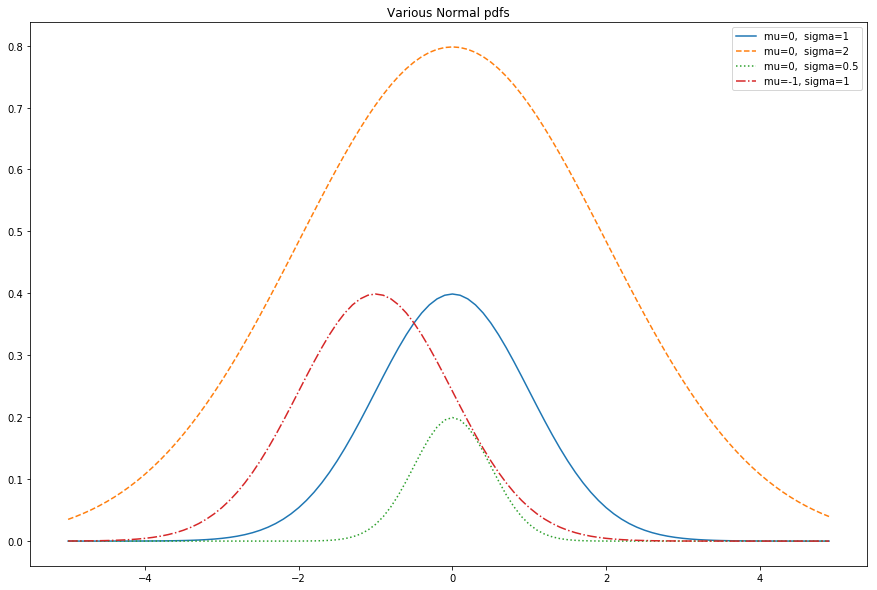

In [5]:
import matplotlib.pyplot as plt

xs = [x / 10.0 for x in range(-50, 50)]
plt.figure(figsize=(15,10))
plt.plot(xs, [normal_pdf(x,sigma=1)   for x in xs], '-',  label='mu=0,  sigma=1')
plt.plot(xs, [normal_pdf(x,sigma=2)   for x in xs], '--', label='mu=0,  sigma=2')
plt.plot(xs, [normal_pdf(x,sigma=0.5) for x in xs], ':',  label='mu=0,  sigma=0.5')
plt.plot(xs, [normal_pdf(x,mu=-1)     for x in xs], '-.', label='mu=-1, sigma=1')
plt.legend()
plt.title("Various Normal pdfs")
plt.show()

In [6]:
def normal_cdf(x, mu=0, sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

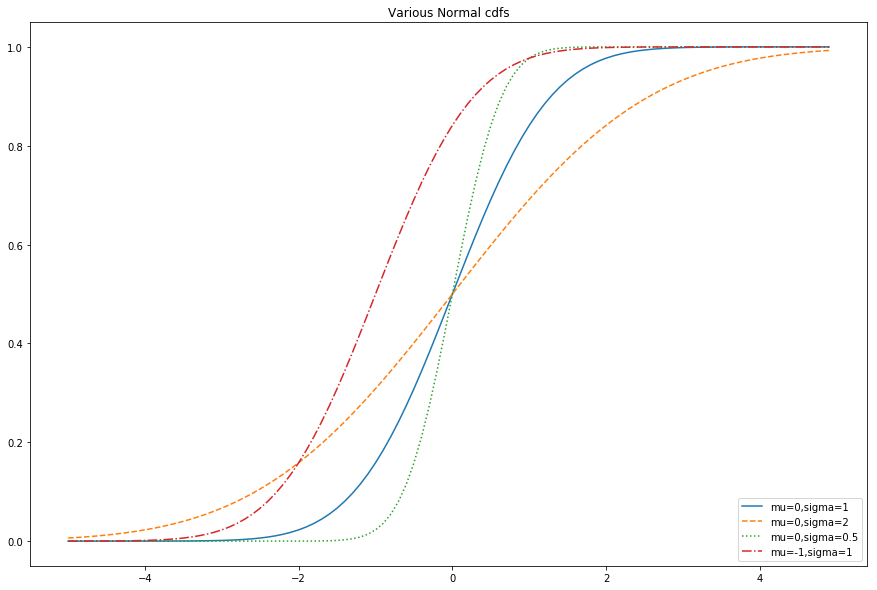

In [11]:
xs = [x / 10.0 for x in range(-50, 50)]
plt.figure(figsize=(15, 10))
plt.plot(xs, [normal_cdf(x, sigma=1)     for x in xs], '-',  label='mu=0,sigma=1')
plt.plot(xs, [normal_cdf(x, sigma=2)     for x in xs], '--', label='mu=0,sigma=2')
plt.plot(xs, [normal_cdf(x, sigma=0.5)   for x in xs], ':',  label='mu=0,sigma=0.5')
plt.plot(xs, [normal_cdf(x, mu=-1)       for x in xs], '-.', label='mu=-1,sigma=1')
plt.legend(loc=4) # bottom right
plt.title("Various Normal cdfs")
plt.show()

In [15]:
def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    """find an approximate inverse using binary search"""
    
    # if not standard, compute standard and rescale
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
        
    low_z = -10.0                   # normal_cdf(-10) is approximately zero
    hi_z  = 10.0                    # normal_cdf(10) is approximately zero
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2  # consider the midpoint
        mid_p = normal_cdf(mid_z)   # and the cdf's value there
        if mid_p < p:
            # midpoint too low? search above it
            low_z = mid_z
        elif mid_p > p:
            # midpoint too high? search below it
            hi_z = mid_z
        else:
            break
    return mid_z

# This function will repeatedly bisect intervals until it narrows in on a z that's 
# close enough to the desired probability